In [1]:
import pandas as pd
df = pd.read_csv("longsong",delimiter='\t',names=['id','datetime','lat','long'],low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['week'] = df['datetime'].dt.week
df2 = df[df["id"]!="DEL"]

C:\Users\soula\AppData\Local\Temp/ipykernel_20168/3743048078.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['datetime'].dt.week


In [2]:
import datetime as dt
df2['epoch'] = (df2['datetime'] - dt.datetime(2015,1,1)).dt.total_seconds()

C:\Users\soula\AppData\Local\Temp/ipykernel_20168/3205834634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['epoch'] = (df2['datetime'] - dt.datetime(2015,1,1)).dt.total_seconds()


In [3]:
df2

,id,datetime,lat,long,week,epoch
236,a71e7667e9e2f4b5018078e216f650e351a43f90c0af92...,2015-03-06 05:23:00,4.891482,45.803972,10.0,5548980.0
238,65cb5d17bcf0517d072e21d0acb801c6c06fe4c7edcdb7...,2015-03-14 20:06:00,4.845365,45.739870,11.0,6293160.0
257,fa3f242fca4e933e044c655b7e4715db012d603b765fd0...,2015-04-01 11:51:00,4.880444,45.793470,14.0,7818660.0
261,81d18421ffbab348dcefcf4c7d4bcb485f47435fd6eb0b...,2015-04-15 23:07:00,5.139598,48.094886,16.0,9068820.0
279,2281e955d70eaed12b6051036f8d7269109650788e6784...,2015-04-11 20:23:00,4.275390,45.545120,15.0,8713380.0
...,...,...,...,...,...,...
34551679,21017f5b96e1f9c256eaf39f29a8578d020ccf4c55fd28...,2015-04-26 22:41:00,4.859334,45.785853,17.0,10017660.0
34551696,1f59156eb85f554867ebeb965224c214e83bd8d0a47e9c...,2015-04-14 03:40:00,4.851241,45.745510,16.0,8912400.0
34551785,4e52d89fd0325423aedfe66239e9cb401642c4aa5c9074...,2015-03-09 01:44:00,4.901159,45.763865,11.0,5795040.0
34551830,9c7fd74874b33687855c75e9a82e482f378de4da697d6f...,2015-03-20 10:34:00,4.859305,45.703645,12.0,6777240.0


In [ ]:
for i in range(10, 21):
    print("week "+str(i))
    df2["count"]=df[(df["week"]==i) & (df['id']!='DEL')] 
    plot(df_week_clean,i)

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
def plot(df,week_number):
    large = 22; med = 16; small = 12
    params = {'axes.titlesize': large,
              'legend.fontsize': med,
              'figure.figsize': (16, 10),
              'axes.labelsize': med,
              'axes.titlesize': med,
              'xtick.labelsize': med,
              'ytick.labelsize': med,
              'figure.titlesize': large}
    plt.rcParams.update(params)
    plt.style.use('seaborn-whitegrid')
    sns.set_style("white")
    %matplotlib inline
    # Create Fig and gridspec
    fig = plt.figure(figsize=(16, 10), dpi= 80)
    grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

    # Define the axes
    ax_main = fig.add_subplot(grid[:-1, :-1])
    ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
    ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
    ax_main.scatter('lat', 'long', alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)
    sns.boxplot(y=df.long, ax=ax_right)
    sns.boxplot(x=df.lat, ax=ax_bottom)
    ax_bottom.set(xlabel='')
    ax_right.set(ylabel='')
#     plt.savefig(f'week_{week_number}.png')
    plt.show()

week 10


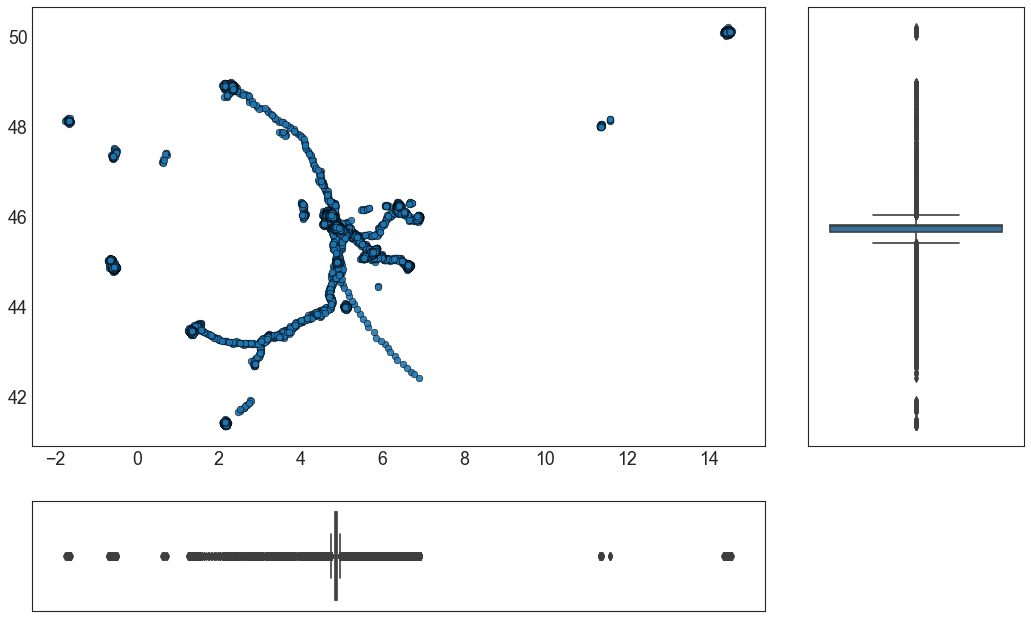

week 11


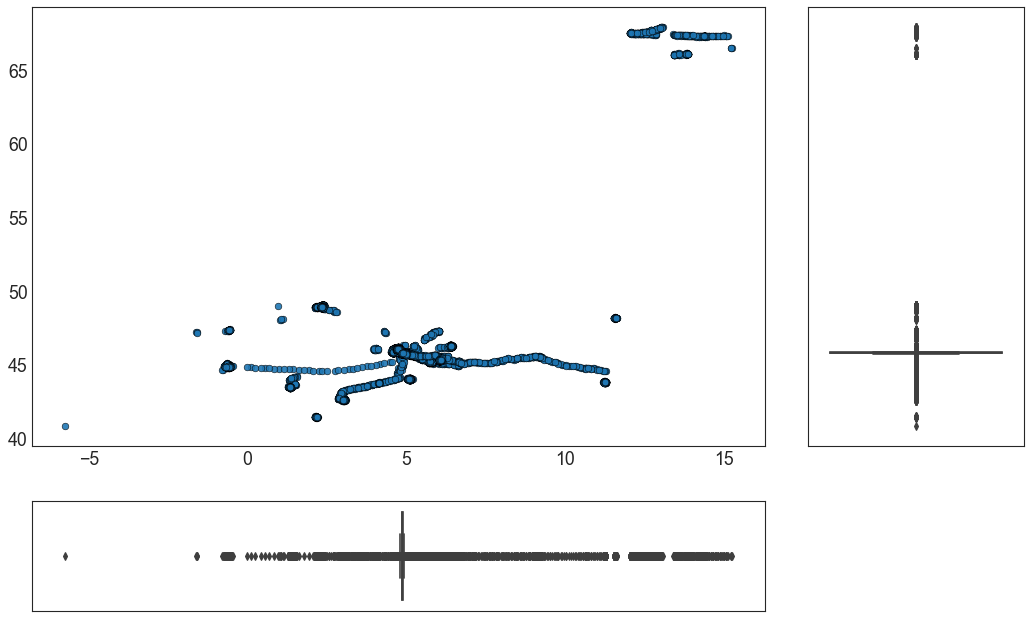

week 12


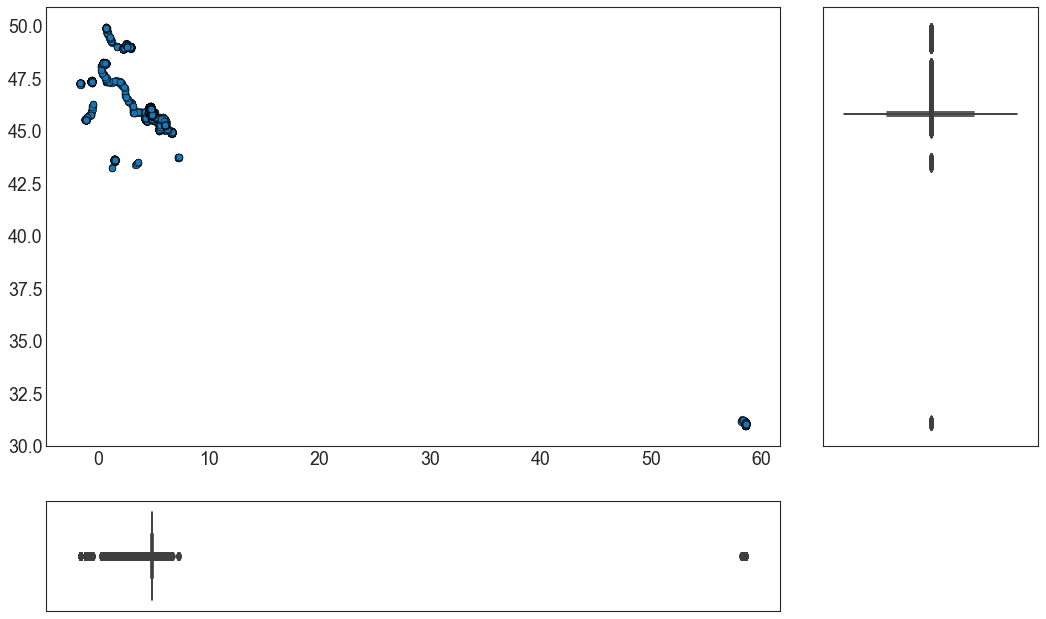

week 13


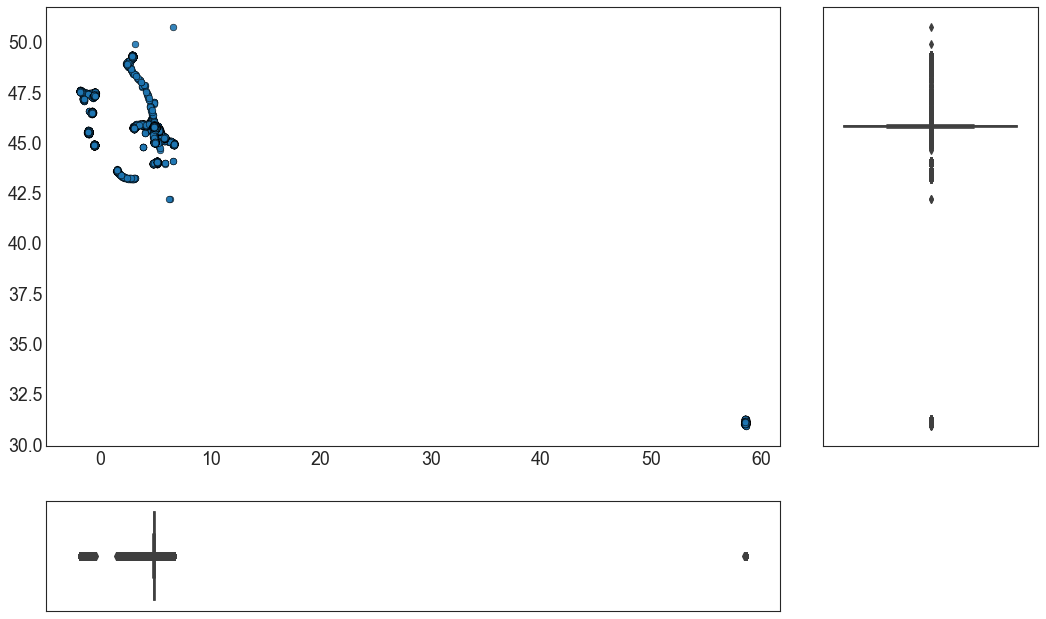

week 14


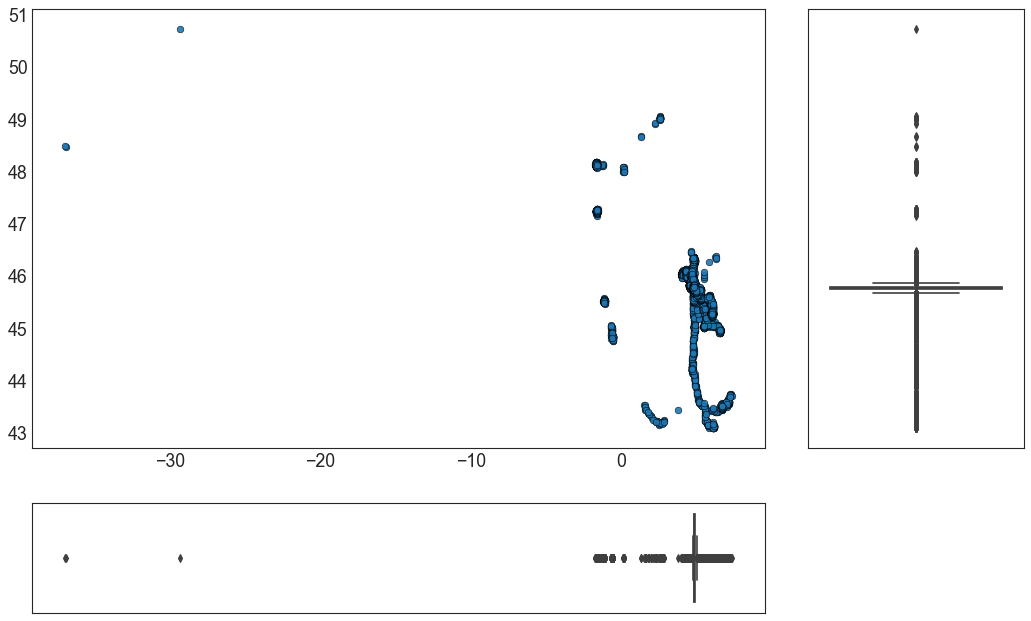

week 15


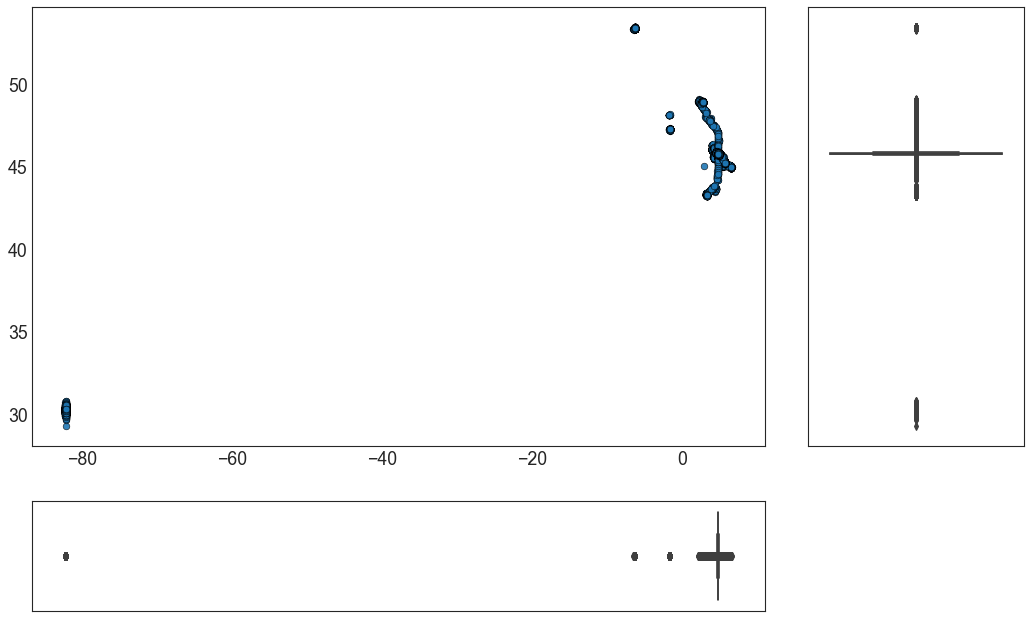

week 16


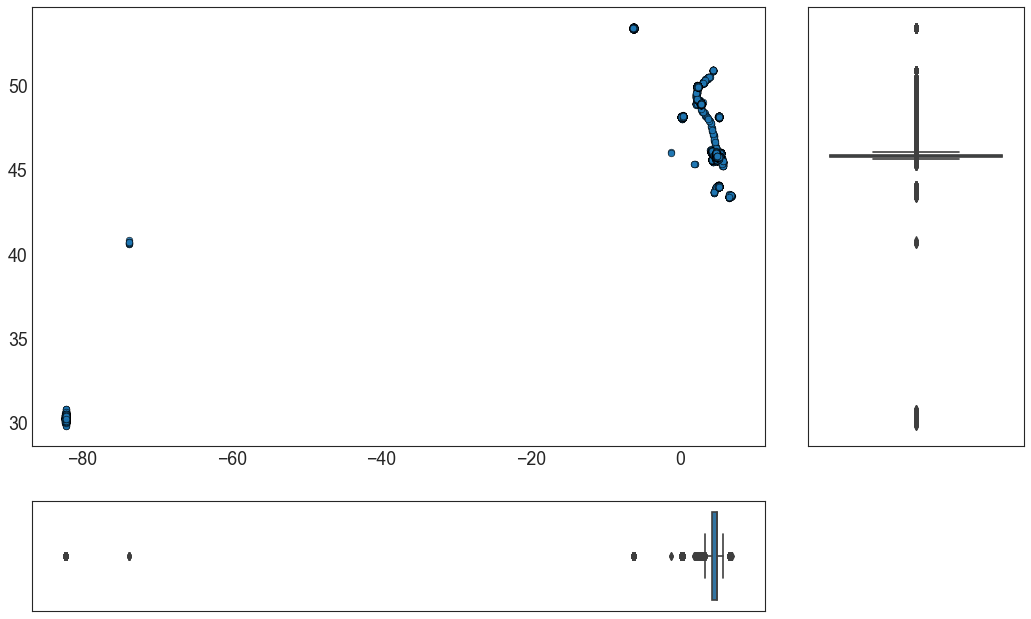

week 17


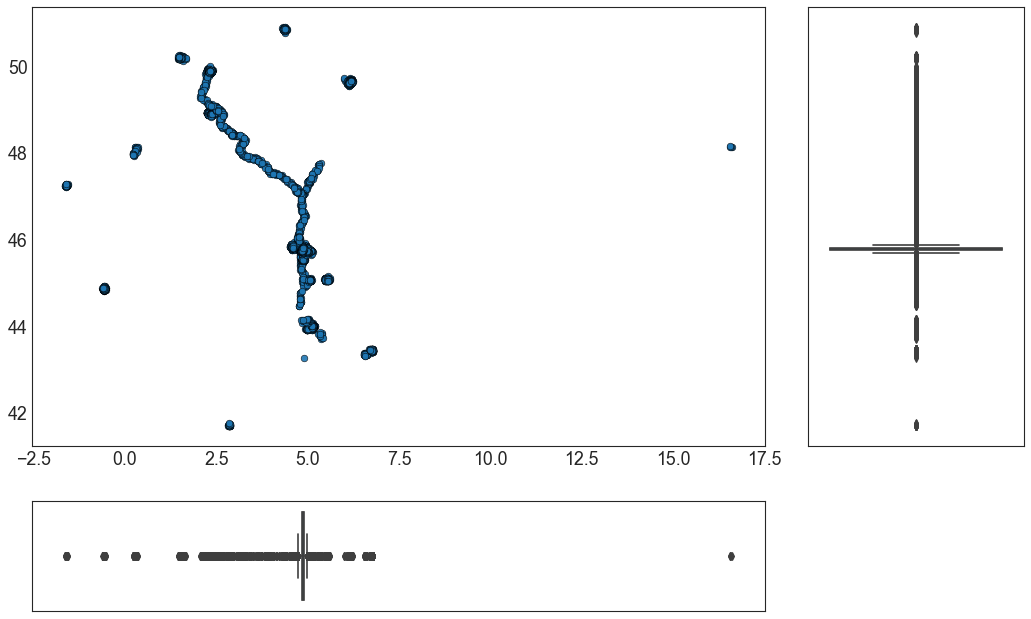

week 18


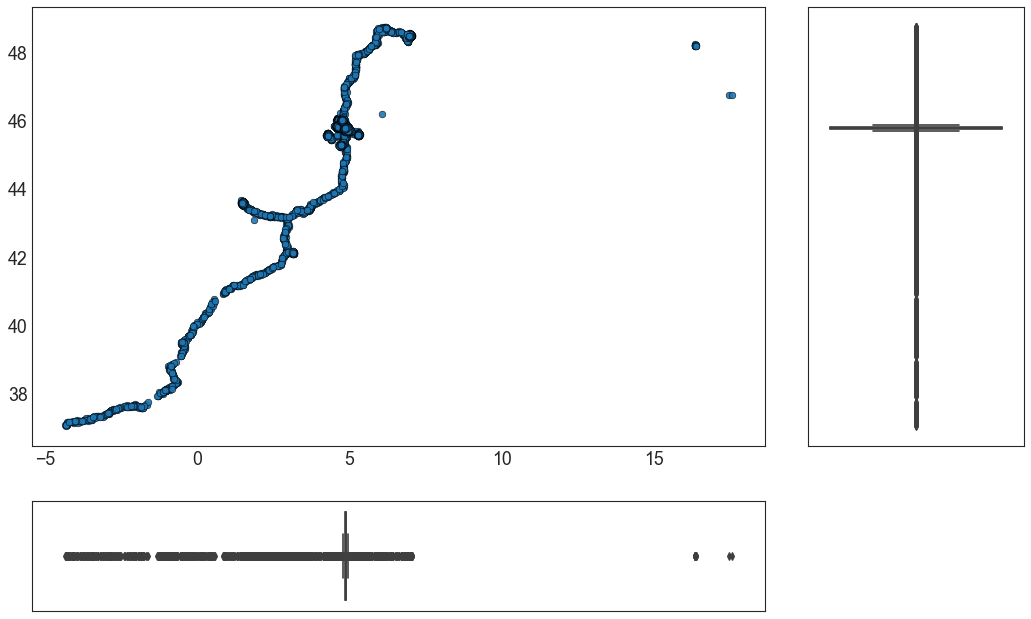

week 19


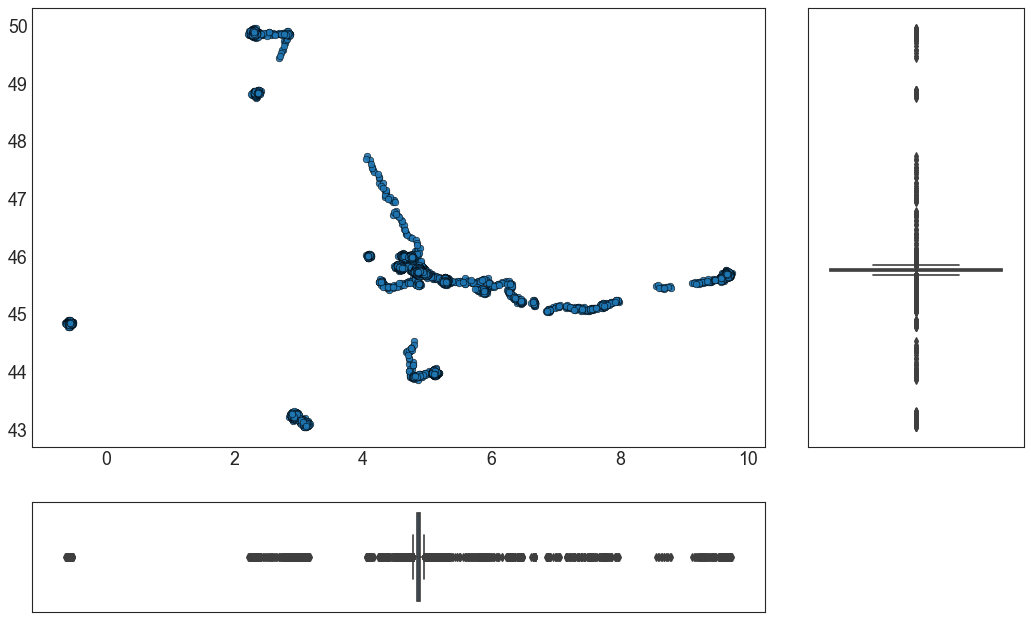

week 20


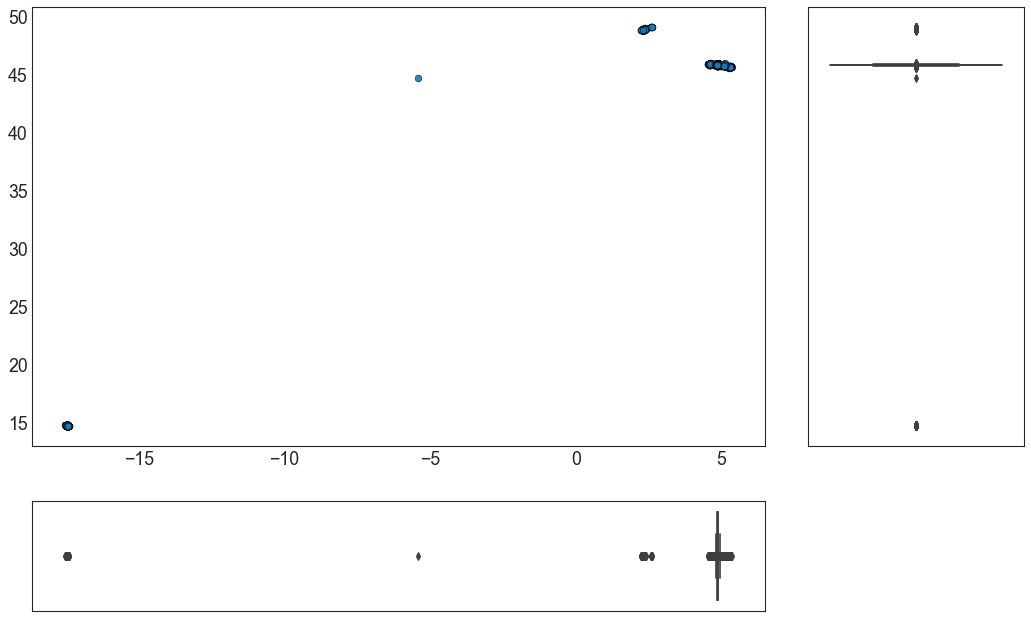

In [7]:
for i in range(10, 21):
    print("week "+str(i))
    df_week_clean=df[(df["week"]==i) & (df['id']!='DEL')] 
    plot(df_week_clean,i)

In [5]:
import matplotlib.pyplot as plt
def plotocc(df):
    fig = plt.figure(figsize=(16, 10), dpi= 80)
    ax = fig.add_axes([0,0,1,1])
    langs = df.groupby("id",as_index=False).size().sort_values("size")["id"]
    students = df.groupby("id",as_index=False).size().sort_values("size")["size"]
    ax.bar(langs,students)
    plt.show()

week 10


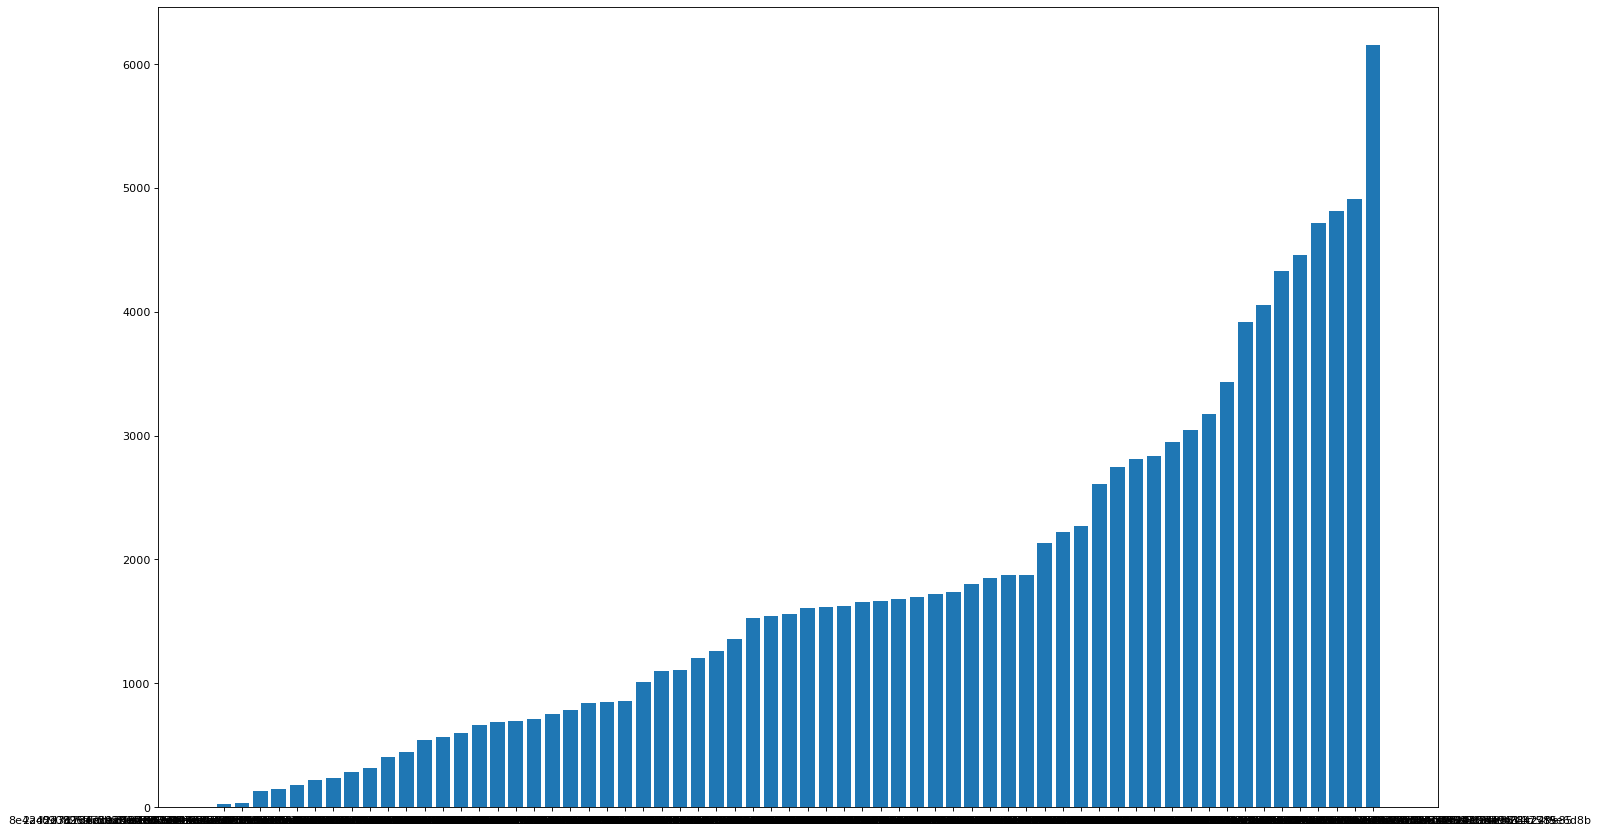

week 11


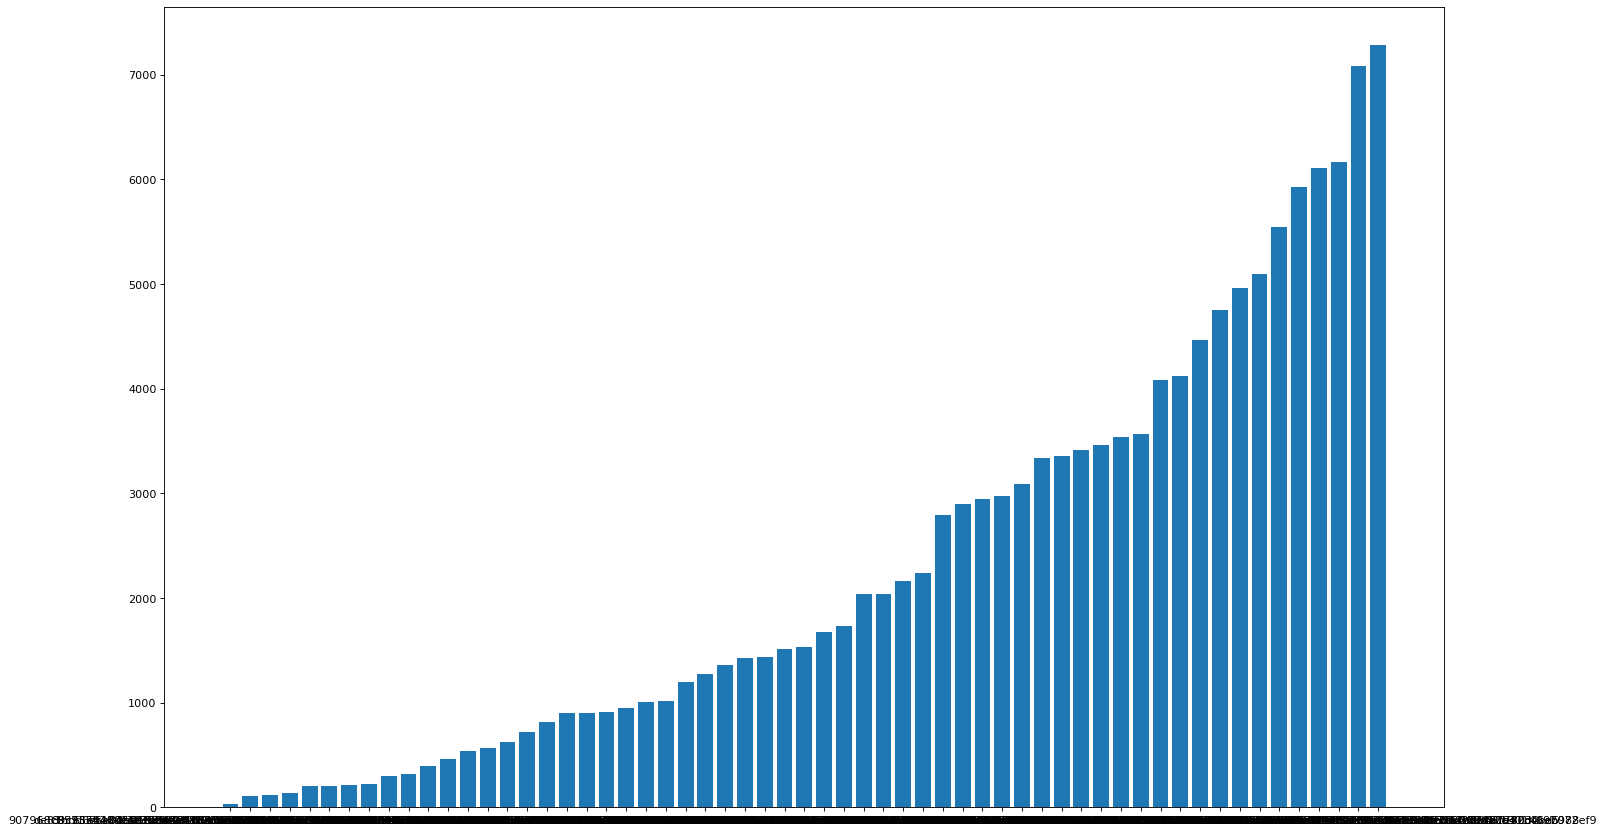

week 12


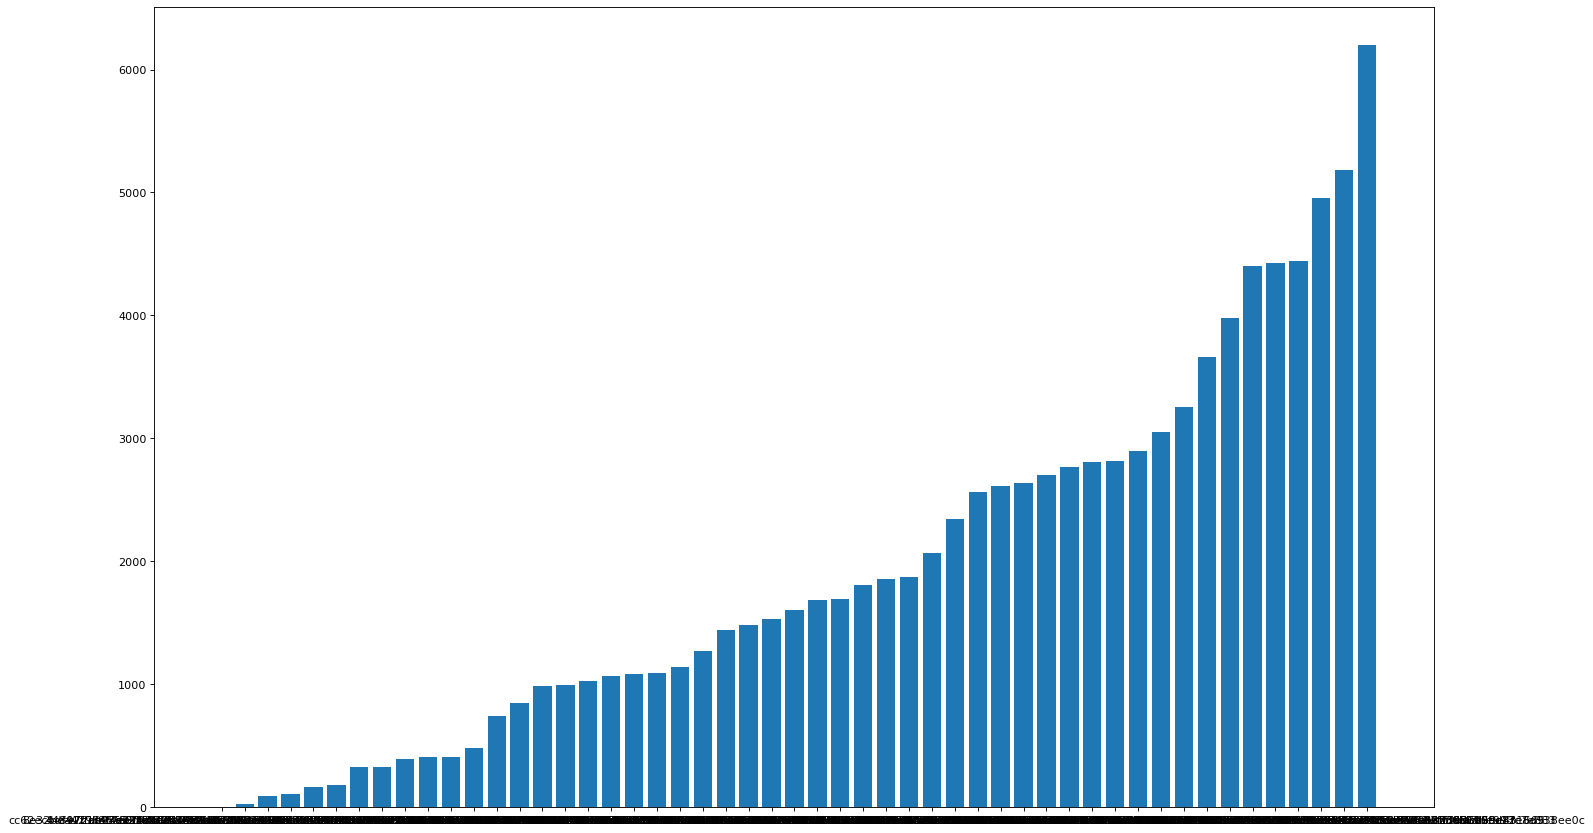

week 13


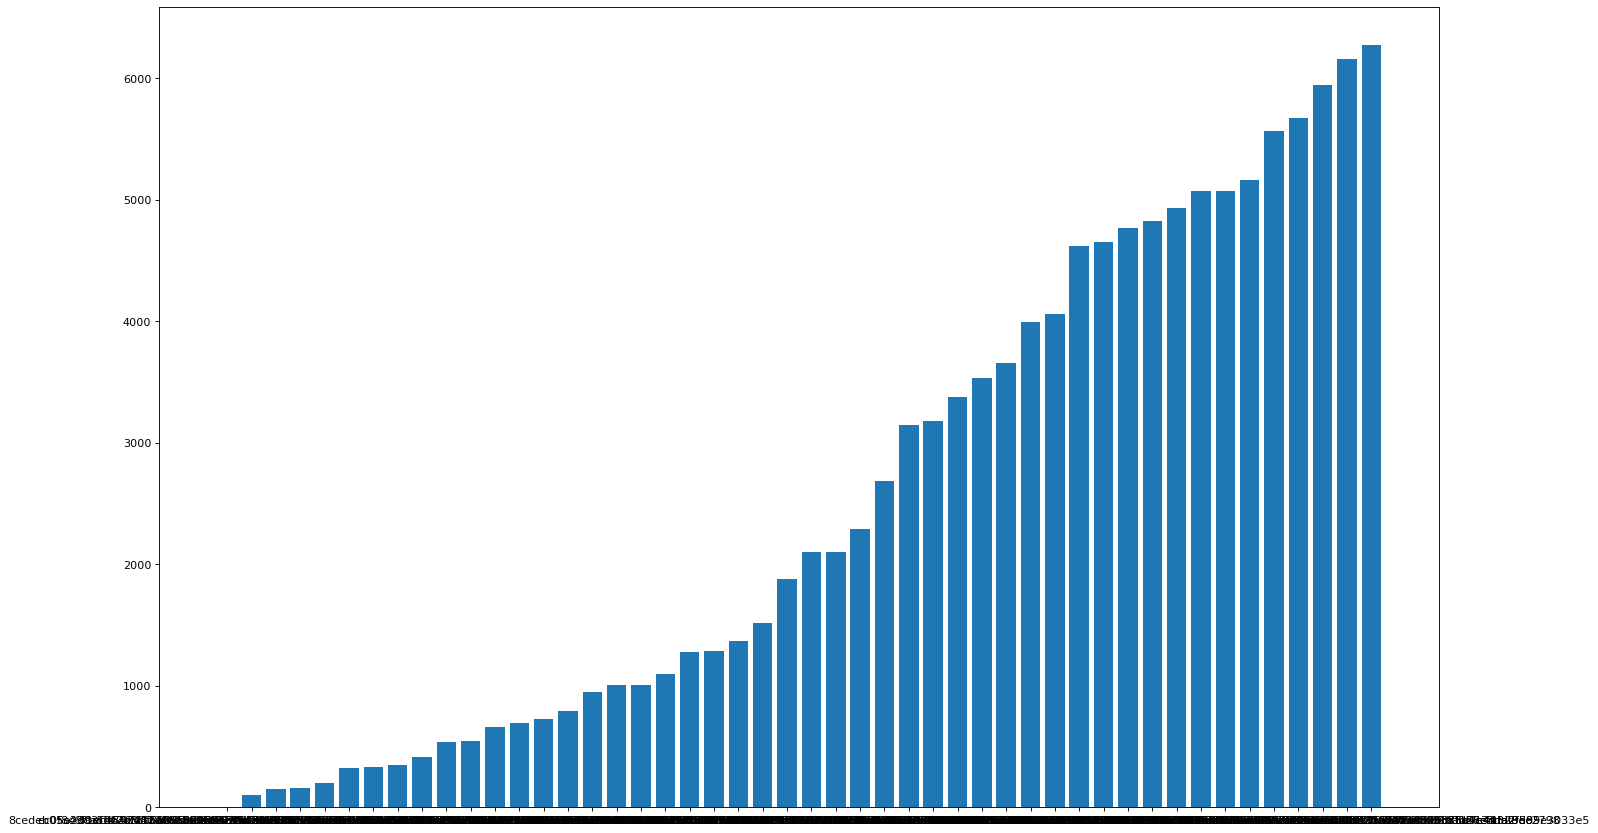

week 14


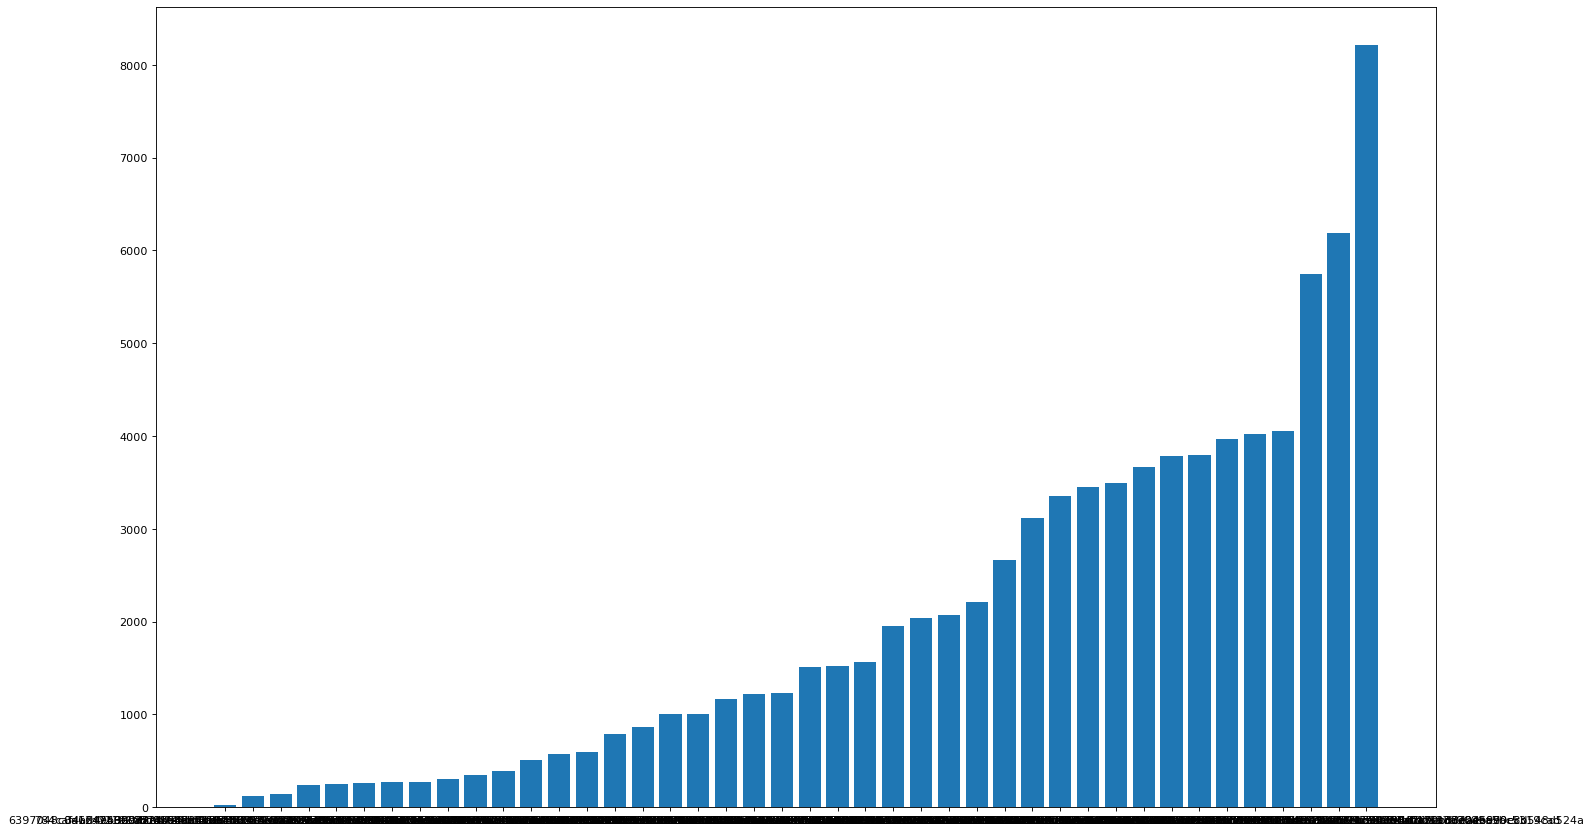

week 15


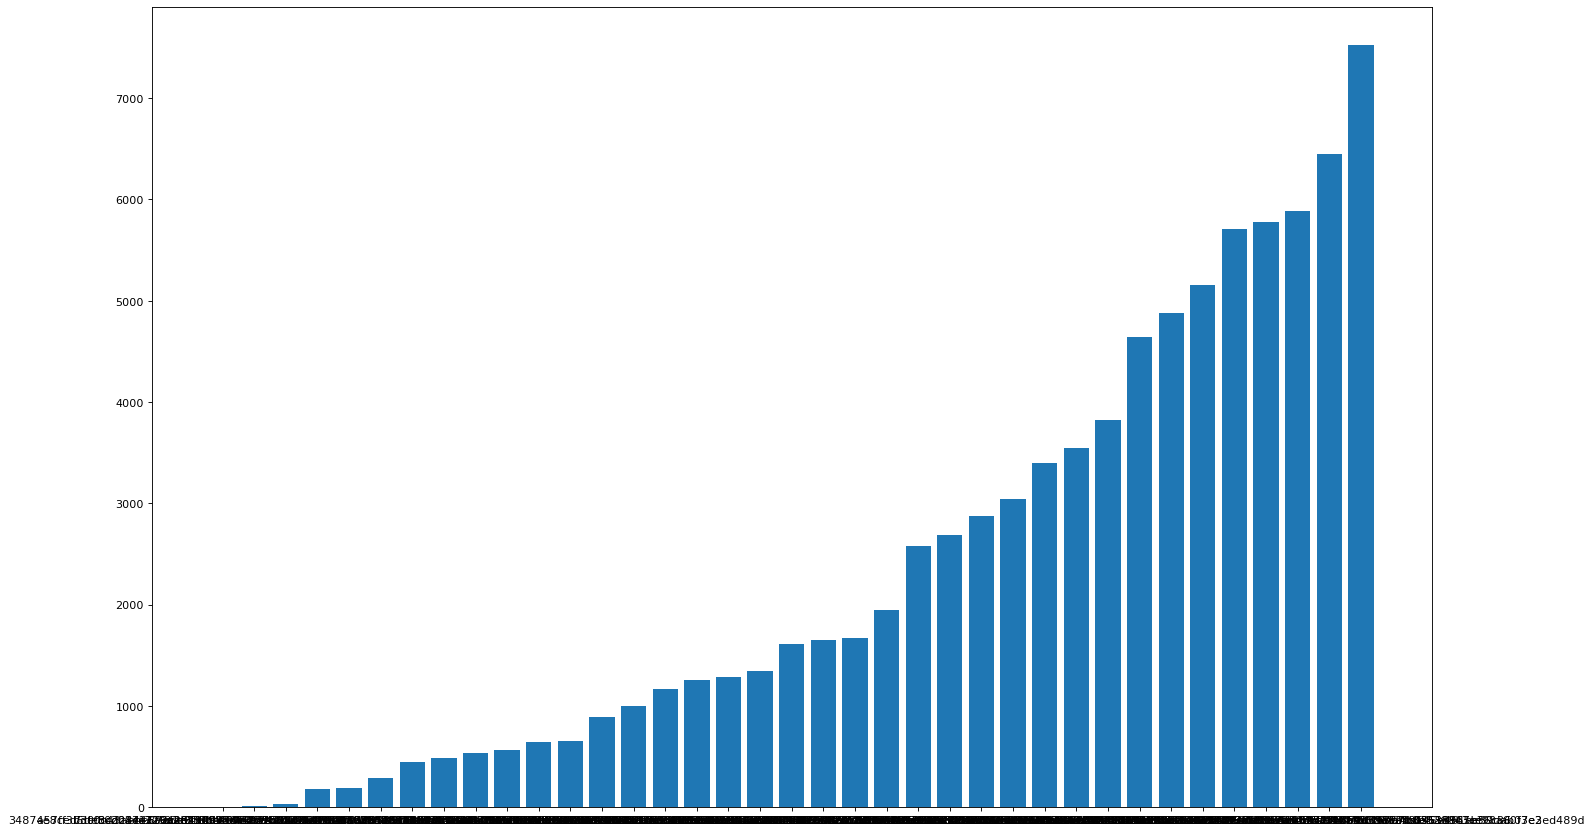

week 16


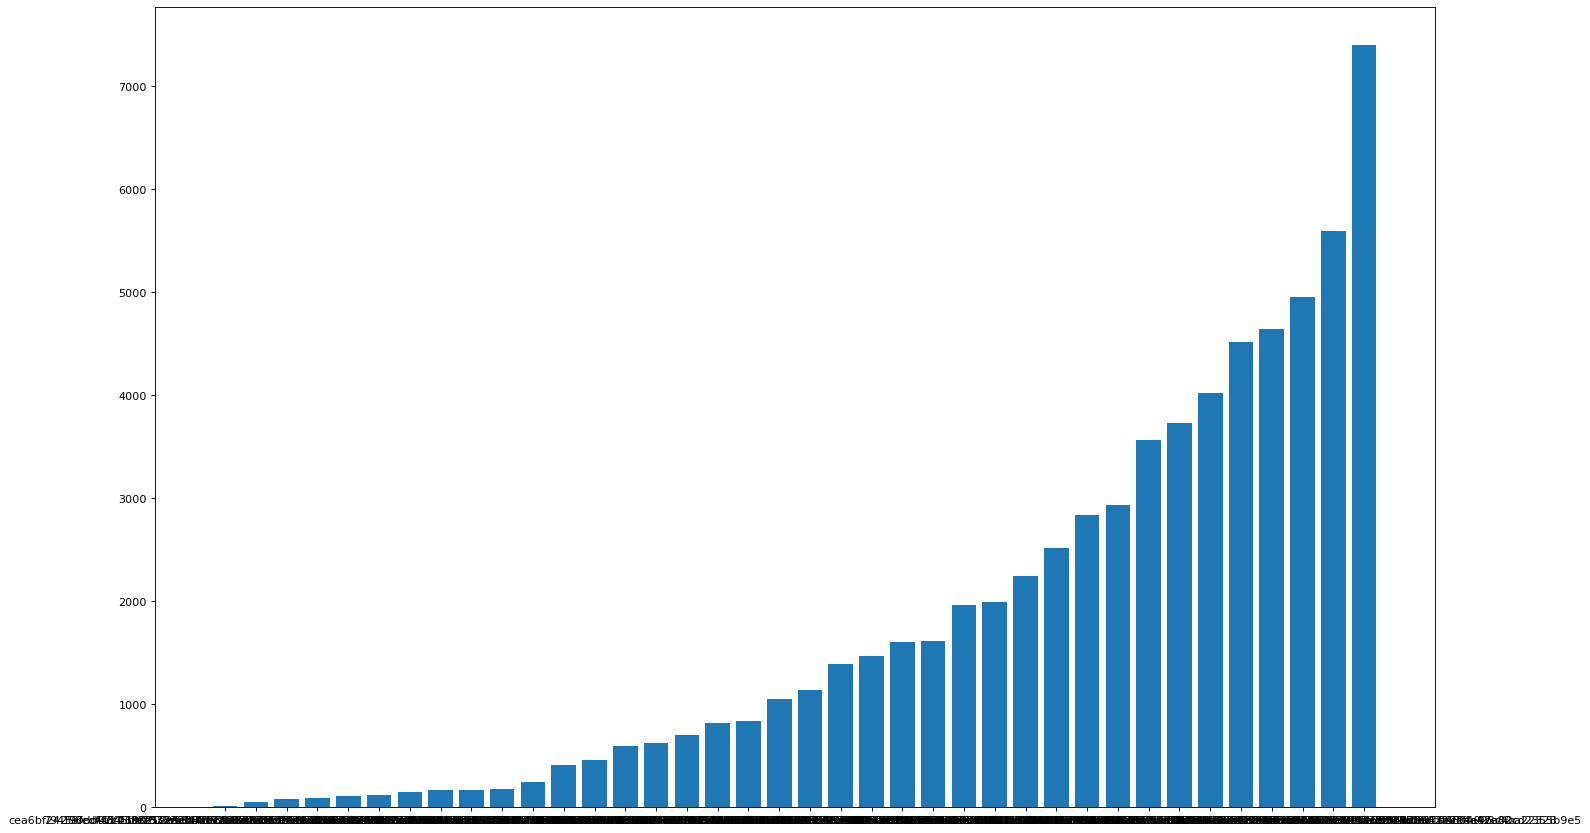

week 17


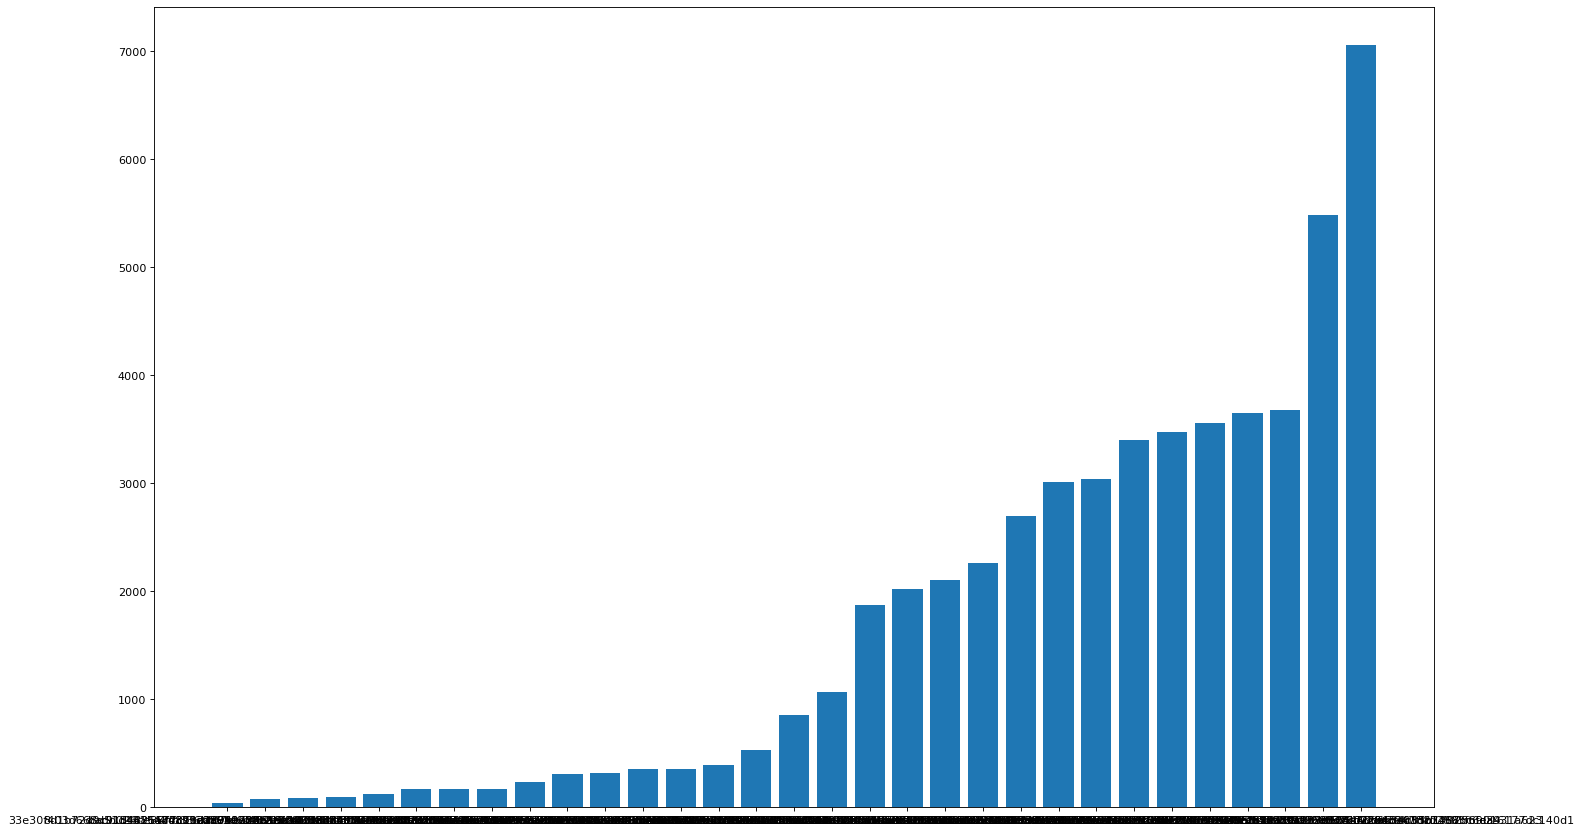

week 18


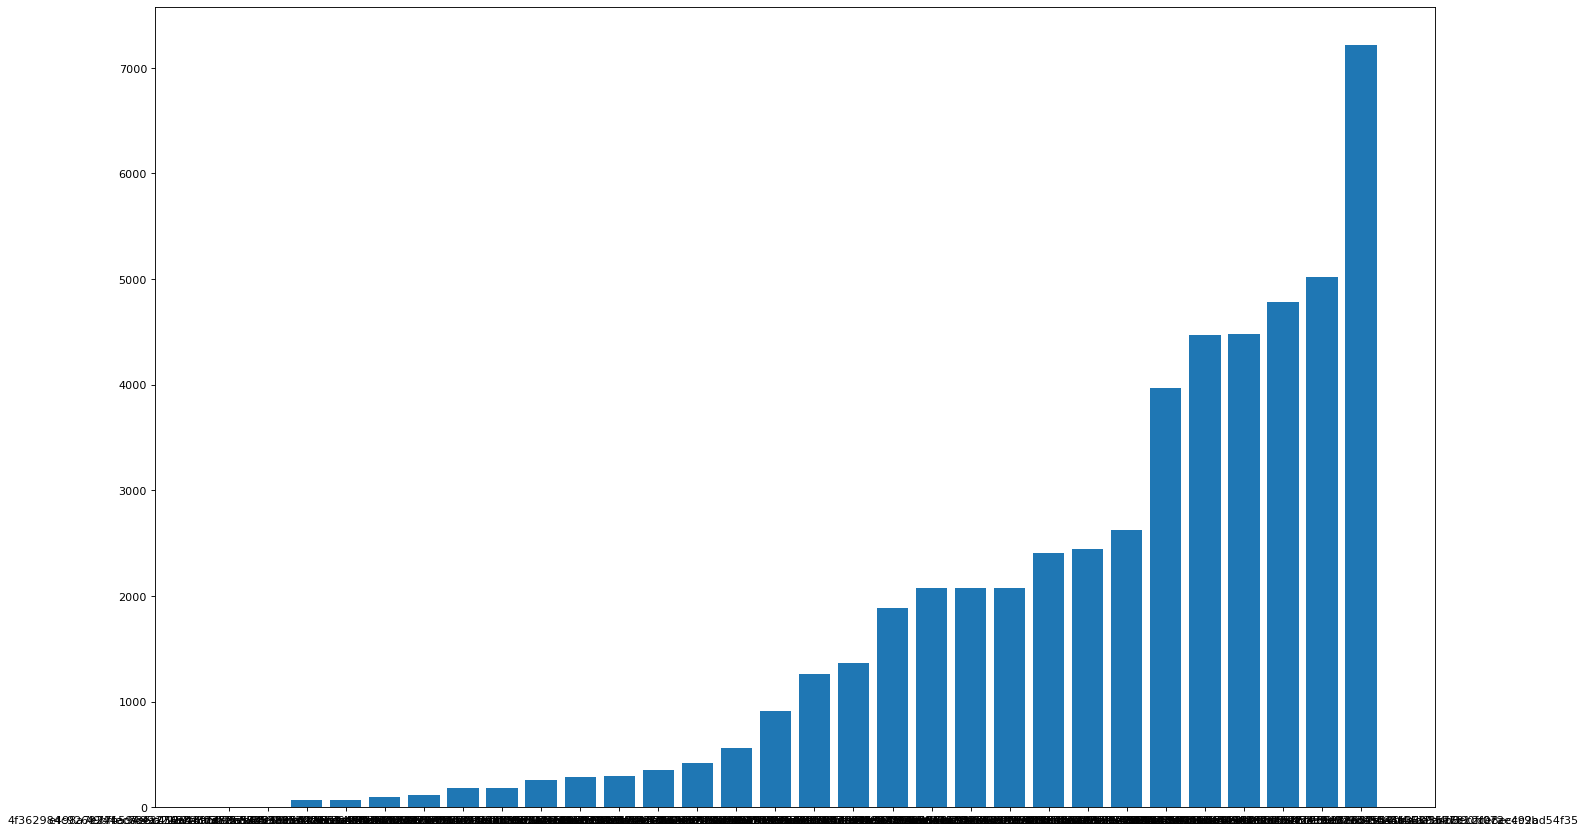

week 19


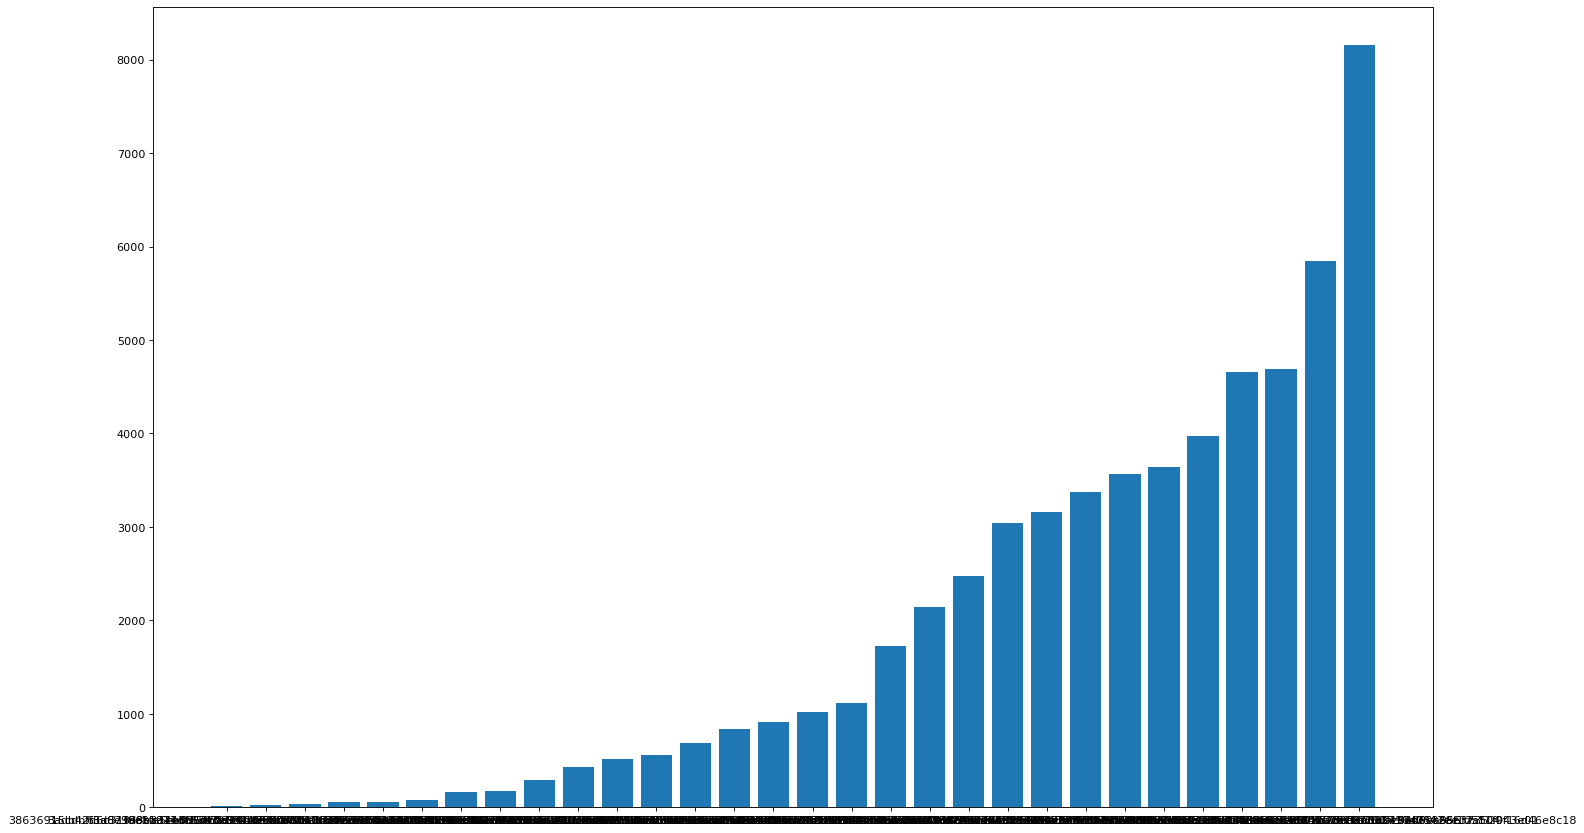

week 20


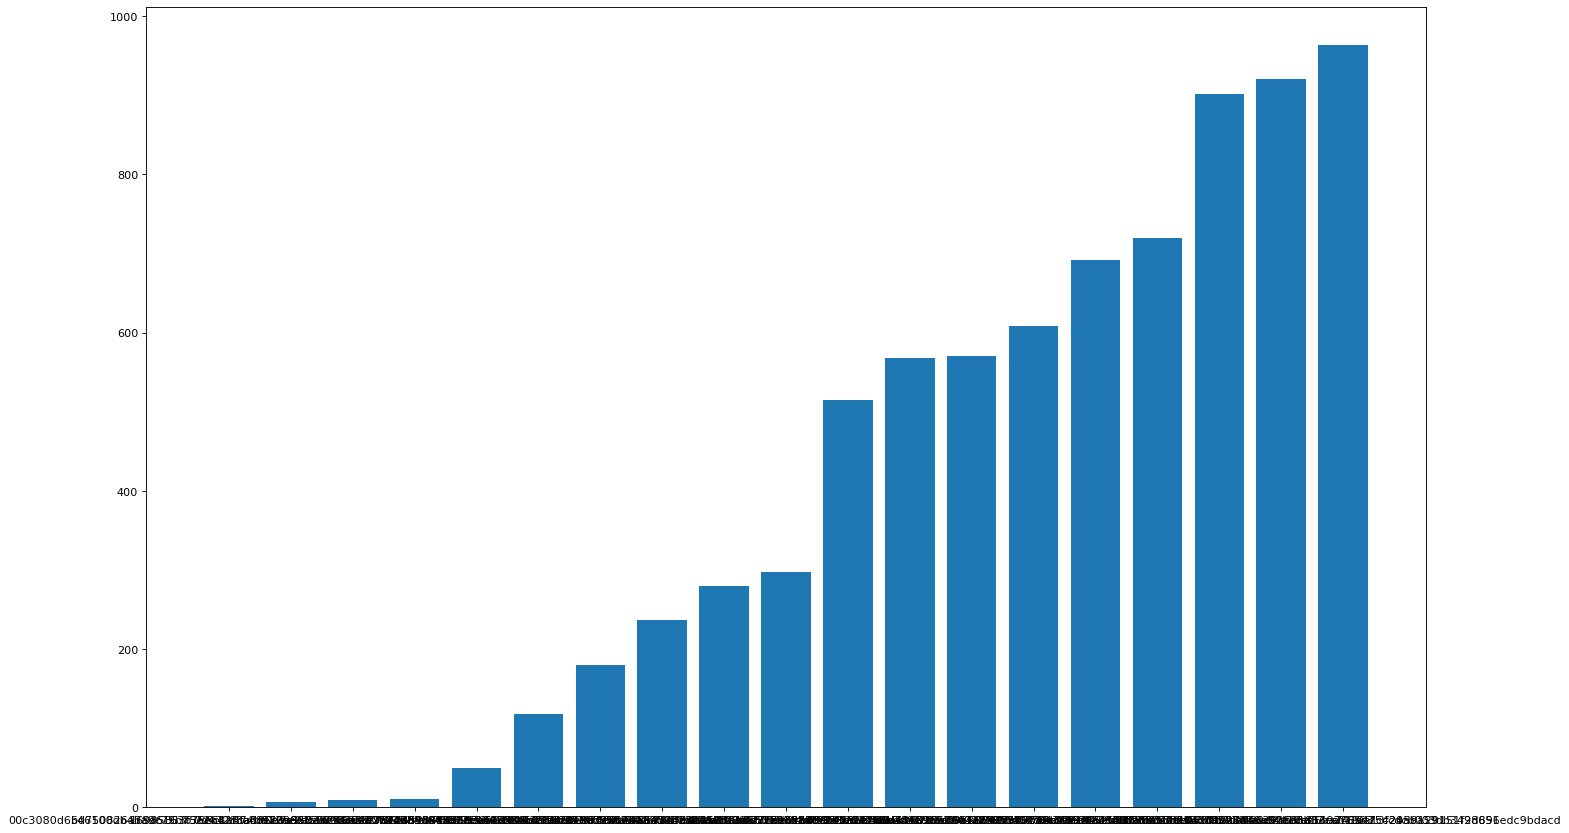

In [6]:
for i in range(10, 21):
    print("week "+str(i))
    klwaa = df[(df["week"]==i)&(df["id"]!="DEL")]
    plotocc(klwaa)

In [9]:

df1 = pd.read_csv('Databases/Original', sep='\t',
                 names=["gid", "datetime", "lat", "long"])
df1['datetime'] = pd.to_datetime(df1['datetime'])
df1['week'] = df1['datetime'].dt.week

C:\Users\soula\AppData\Local\Temp/ipykernel_20168/3834919895.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['week'] = df1['datetime'].dt.week


In [10]:
df1['epoch'] = (df1['datetime'] - dt.datetime(2015,1,1)).dt.total_seconds()

In [33]:
# df1

In [12]:
# weeks=df1['week'].unique()
# pd.set_option('display.max_rows', 500)
# big={}
# for w in weeks:
#     print(f'week {w}')
#     j=0
#     dftmp1=df1[df1['week']==w]
#     dftmp2=df2[df2['week']==w]
#     name="2015-"+str(w)
    
#     dfc=dftmp1.groupby("gid",as_index=False).size()
#     dftmp1=dftmp1.groupby('gid', as_index=False).mean().round(2)
#     dftmp1=dftmp1.merge(dfc, left_on='gid', right_on='gid').sort_values(['size','epoch','long','lat'])
    
#     dfc2=dftmp2.groupby("id",as_index=False).size()
#     dftmp2=dftmp2.groupby('id', as_index=False).mean().round(2)
#     dftmp2=dftmp2.merge(dfc2, left_on='id', right_on='id').sort_values(['size','epoch','long','lat'])
#     print(dftmp1)
#     print(dftmp2)
#     for i in dftmp2['id'].to_numpy():
#         origId=str(dftmp1.iloc[j,0])
# #         nearest_value=find_nearest(dftmp2['lat'].to_numpy(),dftmp1.iloc[j,4] )
#         if origId in big:
#             big[origId][name]=[str(dftmp2.iloc[j,0])]
#         else:
#             dictmp={}
#             dictmp[name]=[str(dftmp2.iloc[j,0])]
#             tmp_dict={
#                 origId:dictmp
#             }
#         big.update(tmp_dict)
#         j+=1

In [82]:
def findAno(dfOrig, dfAno, week):
    dfOrig = dfOrig.sort_values(by="epoch")
    name="2015-"+str(week)
    for i in range(0,len(dfOrig)):
        print(dfOrig.iloc[i,0],"-->",dfAno.iloc[i,0])
        guesses[str(dfOrig.iloc[i,0])][name].append(str(dfAno.iloc[i,0]))

In [105]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def findAno2(dfOrig, dfAno, week):
    name="2015-"+str(week)
    print(dfAno)
    for i in range(0,len(dfOrig)):
        idx = find_nearest(dfAno["epoch"],dfOrig.iloc[i,2])
        guesses[str(dfOrig.iloc[i,0])][name].append(str(dfAno.iloc[idx,0]))
#         dfAno.drop(dfAno.index[[idx]], inplace=True)


In [22]:
weeks=df1['week'].unique()
ids = df1["gid"].unique()
guesses = {}
big={}
for id in ids:
    guesses[str(id)]={}
    for w in weeks:
        name="2015-"+str(w)
        guesses[str(id)][name]=[]

pd.set_option('display.max_rows', 500)
for w in weeks:
    print(f'week {w}')
    j=0
    dftmp1=df1[df1['week']==w]
    dftmp2=df2[df2['week']==w]
    dftmp1=dftmp1.groupby("gid",as_index=False).size().sort_values("size")
    dftmp2=dftmp2.groupby("id",as_index=False).size().sort_values("size")
    print(dftmp1)
    print(dftmp2)
#     name="2015-"+str(w)
#     for i in dftmp1['gid'].to_numpy():
#         origId=str(dftmp1.iloc[j,0])
#         guesses[origId][name].append(str(dftmp2.iloc[j,0]))
#         j+=1

        

week 10
    gid    size
61   98     444
14   18     923
47   63    1221
62  107    3215
3     5    4110
48   66    5690
57   78    6285
25   32    9355
23   30   10788
56   77   10917
50   68   13932
22   29   17236
36   48   20391
63  110   21330
27   35   23289
1     2   25958
9    13   26630
58   83   27795
54   73   28793
45   60   29292
49   67   29431
18   25   31891
52   71   32045
12   16   33842
26   34   40400
17   24   40813
37   49   43040
0     1   44206
31   39   50086
32   41   54081
15   21   57313
60   89   57569
16   23   60424
53   72   62426
34   43   63065
41   54   63619
44   59   64141
19   26   65747
7     9   65969
21   28   68292
13   17   69997
29   37   71442
55   75   72964
43   58   73220
35   44   75217
11   15   84489
39   51   91340
24   31   94913
6     8   98249
10   14  108846
5     7  109984
40   52  113117
38   50  121997
20   27  122658
42   55  128640
59   87  144654
28   36  151283
8    11  162072
51   69  181189
33   42  183845
2     4  198951


    gid    size
19   34      14
34   63     989
20   38    3247
48   84    4396
35   65    6156
9    16    6711
30   55   12234
41   71   13371
46   78   13465
38   68   14882
40   70   16849
8    15   19224
45   77   26671
16   30   31469
50  107   37157
0     1   40078
6     9   41093
12   24   41134
24   44   41934
11   18   44981
18   32   46745
29   53   48778
3     6   58664
47   81   59589
36   66   59635
21   41   65954
28   52   67352
5     8   68719
1     2   69531
32   60   69658
44   75   76802
25   49   79191
13   26   90710
42   72   95585
37   67  101775
39   69  102983
23   43  108906
22   42  109114
27   51  116951
33   62  117390
17   31  119217
31   59  124061
7    13  129496
43   73  152605
15   28  170287
26   50  180045
49   87  183669
4     7  183814
10   17  213118
14   27  217360
2     4  249398
                                                   id  size
42  cc62ecbdf42ffafef4ee7f09ba4446a48d244a3e605eca...     1
26  8e32bea4298455323bae2ab9f0b698db3c423353a35a

    gid    size
10   26      19
11   27     568
31   71    1012
36   83    7505
19   44    8090
26   65   10635
25   63   17052
8    18   18271
20   49   19569
16   39   20675
14   32   22937
29   68   26541
15   35   35027
27   66   42123
7    13   43615
9    24   49495
4     7   51215
22   51   51612
34   75   65951
12   30   66098
17   41   71117
13   31   77391
1     2  100047
33   73  112848
24   62  115742
30   69  117045
28   67  135401
6     9  138318
18   42  155154
32   72  169877
0     1  199893
21   50  212878
5     8  230495
35   81  232623
23   59  237176
2     4  254884
3     6  290113
                                                   id  size
8   3487457ff3b3c0c43aebe87e5d2ce31fdda4e4fc7b09a4...     1
24  ae8ced5debc208ce316a2619afc49767b5bf0427e9ae1f...    17
17  7d9f3cdc1e1776a2e4d4fa9f4c3b742ba06dff718f9a03...    31
19  80d24446a2caf833b4f1064f5cd6113606bac19a053e65...   184
16  7c729d2e231935efd8d9081a7f2317df532938fc06a9d4...   189
20  8da010bca67e21d632245ef903fb

    gid    size
5    17     571
16   58     722
13   43    1053
10   32    1962
4    13    2067
20   63    3006
8    26    5922
21   66    6849
28   83   11556
9    30   16344
11   39   20671
6    18   23605
26   73   28647
23   68   32663
29   87   33645
3     9   36672
15   51   38215
7    24   70008
0     1   80943
27   75   99873
17   59  117795
18   60  125797
22   67  134454
1     2  134631
12   42  136038
14   50  153061
25   72  167881
19   62  196825
24   69  224026
2     4  335942
                                                   id  size
6   38636915cdbfd6c31f6e81917db55ace604cb54b5f91c8...    14
7   3adb42f3a6e99c1fa5ce6960b9d60dde361ff0ae33e719...    19
12  63d87399baa743f158391c11098b877d0d6f7efe1bc48a...    34
9   3d8e334b0b6772934ca33dca0749c83efd244fe8ea3750...    54
28  ee8d5dc0a951d698b73613ce0ecf8c3f33aef3677eb386...    57
25  d43e0e7455507d111cd491bb564bedb2ef2e8d620eb407...    81
29  f41aba0b6b60625137b76b90dd69d986e8a12ec4ea0427...   164
13  6a45adb74920013d3170

In [21]:
import json
with open('longsong.json', 'w') as f:
    json.dump(guesses, f)

In [11]:
df1.size

207311094